First 5 predictions: [1 0 0 1 1]
Accuracy: 0.9649122807017544

Confusion Matrix:
[[40  3]
 [ 1 70]]

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.93      0.95        43
           1       0.96      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



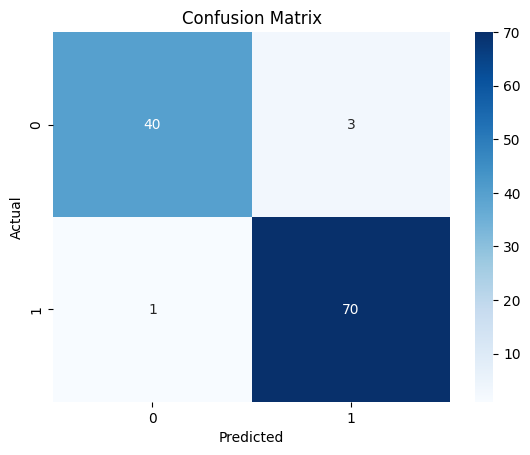

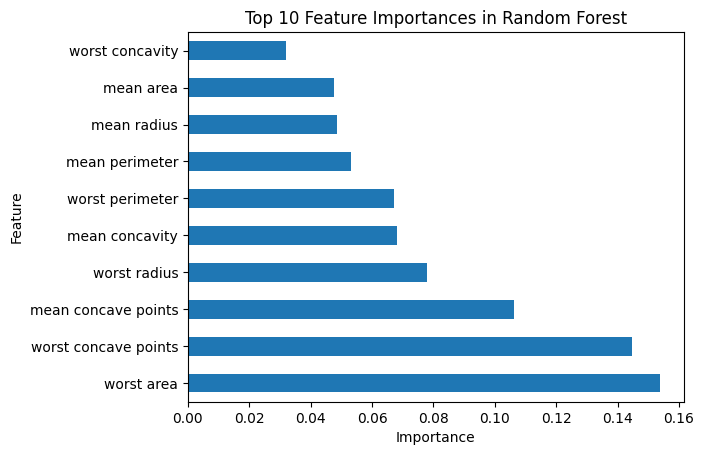

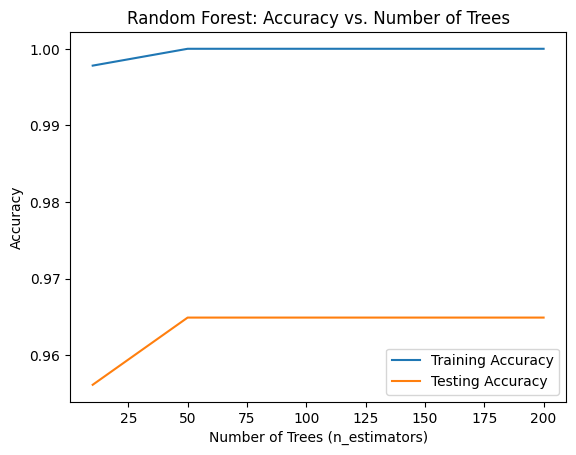

Best n_estimators value: 50
Best test accuracy: 0.9649122807017544
Accuracy with best n_estimators: 0.9649122807017544


In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import joblib
np.random.seed(42)

cancer = load_breast_cancer()
data = pd.DataFrame(data=cancer.data, columns=cancer.feature_names)
data['target'] = cancer.target
X = data.drop('target', axis=1)
y = data['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
# Step 6: Make Predictions
y_pred = model.predict(X_test)
print("First 5 predictions:", y_pred[:5])


accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(cm)
report = classification_report(y_test, y_pred)
print("\nClassification Report:")
print(report)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


feature_importance = pd.Series(model.feature_importances_, index=cancer.feature_names)
feature_importance.nlargest(10).plot(kind='barh')
plt.title('Top 10 Feature Importances in Random Forest')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


n_estimators_values = [10, 50, 100, 200]
train_scores = []
test_scores = []
for n in n_estimators_values:
    rf = RandomForestClassifier(n_estimators=n, random_state=42)
    rf.fit(X_train, y_train)
    train_scores.append(rf.score(X_train, y_train))
    test_scores.append(rf.score(X_test, y_test))

plt.plot(n_estimators_values, train_scores, label='Training Accuracy')
plt.plot(n_estimators_values, test_scores, label='Testing Accuracy')
plt.xlabel('Number of Trees (n_estimators)')
plt.ylabel('Accuracy')
plt.title('Random Forest: Accuracy vs. Number of Trees')
plt.legend()
plt.show()

best_n = n_estimators_values[np.argmax(test_scores)]
print("Best n_estimators value:", best_n)
print("Best test accuracy:", max(test_scores))

model = RandomForestClassifier(n_estimators=best_n, random_state=42)
model.fit(X_train, y_train)
y_pred_best = model.predict(X_test)
print("Accuracy with best n_estimators:", accuracy_score(y_test, y_pred_best))
